In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
pd.options.display.max_rows = 999

import numpy as np

from matplotlib import pyplot
import seaborn as sns
# import seaborn
sns.set(color_codes=True)
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Phân tích và trực quan dữ liệu/data_final.xlsx')

#Format names of columns
df.rename(columns = {'Tên sản phẩm': 'Name',
                     'Giá':'Price',
                     'Loại sản phẩm':'Type',
                     'Số sao trung bình':'Average_Star',
                     'Lượt bán':'Sales',
                     'Số lượt đánh giá':'Reviews',
                     'comment':'Comment',
                     'label':'Label',
                     'words':'Words',
                     'rating':'Rating'}, inplace=True) 
df.drop(['Unnamed: 0','Unnamed: 0.1','Words'], axis=1, inplace = True)
#print 5 samples of data
df.sample(5)

,Name,Price,Type,Average_Star,Sales,Reviews,Comment,Label,Rating
3866,THÙNG 300 CHIẾC KHẨU TRANG CÁ KHÁNG KHUẨN 4D K...,279000,Sức khỏe,4.7,1200,312,Chất lượng tốt sản phẩm giao nhanh hơn dự kiến...,2,5
2951,[Mã FMCGMALL giảm 8% đơn từ 250K] WHISKAS® Thứ...,220000,Thú cưng,4.9,2700,873,"Cuối cùng cũng nhận được hàng, oder trong dịch...",2,5
3827,THÙNG 300 CHIẾC KHẨU TRANG CÁ KHÁNG KHUẨN 4D K...,279000,Sức khỏe,4.7,1200,312,"Giao hàng đầy đủ, đóng gói chắc chắn.............",1,5
1084,"Serum Trắng Da, Mờ Nám Tàn Nhang - V9Queen Mỹ ...",150000,Mỹ phẩm,5.0,1700,301,Sản phẩm rất là ok mọi người nhé Serum dùng rấ...,2,5
1969,Nồi chiên không dầu điện tử 5.5L BlueStone AFB...,2499000,Thiết bị điện gia dụng,4.8,1700,731,"Nồi đẹp, rất chắc chắn. Đáng đồng tiền bât gạo...",1,5


# Kiểm tra kiểu dữ liệu 

In [19]:
df['Name'] = df['Name'].astype('category')
df['Type'] = df['Type'].astype('category')

In [102]:
df.shape

(4183, 9)

In [20]:
df.describe()

,Price,Average_Star,Sales,Reviews,Label,Rating
count,4.183000e+03,4183.000000,4183.000000,4183.000000,4183.000000,4183.000000
mean,3.511742e+05,4.856538,1914.535023,610.814965,1.233325,4.801100
std,6.640018e+05,0.076225,748.075208,170.281176,0.538404,0.710735
min,1.290000e+04,4.700000,1100.000000,301.000000,0.000000,1.000000
25%,8.500000e+04,4.800000,1300.000000,493.000000,1.000000,5.000000
50%,1.150000e+05,4.800000,1700.000000,581.000000,1.000000,5.000000
75%,2.200000e+05,4.900000,2300.000000,741.000000,2.000000,5.000000
max,2.499000e+06,5.000000,3600.000000,873.000000,2.000000,5.000000


In [21]:
df.dtypes

Name            category
Price              int64
Type            category
Average_Star     float64
Sales              int64
Reviews            int64
Comment           object
Label              int64
Rating             int64
dtype: object

# Kiểm tra có hàng trùng nhau


In [22]:
print('shape of data: ', df.shape)
print('check duplicates: ', df.drop_duplicates().shape)

shape of data:  (4183, 9)
check duplicates:  (4154, 9)


vậy nên: bộ dữ liệu không có dữ liệu trùng nhau

In [23]:
print('Có {} mặt hàng được đánh giá trong bộ dữ liệu.' .format(df['Name'].drop_duplicates().shape[0]))

Có 651 mặt hàng được đánh giá trong bộ dữ liệu.


In [46]:
print('Có {} phân loại sản phẩm được đánh giá trong bộ dữ liệu.' .format(df['Type'].drop_duplicates().shape[0]))
print('-----------------------------------------------------------')
print('\nSố lượng từng phân loại sản phẩm có trong bộ dữ liệu:\n\n', 
      df.groupby('Type').count().sort_values('Rating', ascending = False)['Rating'])

Có 8 phân loại sản phẩm được đánh giá trong bộ dữ liệu.
-----------------------------------------------------------

Số lượng từng phân loại sản phẩm có trong bộ dữ liệu:

 Type
Thú cưng                  752
Thời trang                717
Thiết bị điện gia dụng    637
Bảo hộ giao thông         460
Mỹ phẩm                   417
Sức khỏe                  416
Đồng hồ                   404
Thiết bị điện tử          380
Name: Rating, dtype: int64


In [25]:
product_name_counts = df['Name'].value_counts().to_frame()
product_name_counts.rename(columns={'Name':'value_counts'},inplace = True)
product_name_counts.index.name = 'product_name'
product_name_counts

,value_counts
product_name,
Áo cổ lọ tay dài thời trang thu đông nhiều màu trơn tùy chọn cho nữ,484
Lược Chải Lông Chuyên Nghiệp Tiện Dụng Cho Thú Cưng,391
[Mã FMCGMALL giảm 8% đơn từ 250K] WHISKAS® Thức ăn cho mèo lớn dạng hạt vị cá biển 3kg (1 túi),361
Bộ trang điểm PINKFLASH phiên bản đặc biệt với phấn mắt + son lì mềm môi + phấn má hồng + phấn nền kiểm soát dầu,287
Đồng hồ thể thao nam nữ Unisex cao cấp chính hãng SPORT WATCH siêu hot giá rẻ,253
"Mũ bảo hiểm 3/4 đầu TẶNG KÈM MÁI TRE Classic viền nâu, lót màu cao cấp - tặng kèm lưỡi trai",240
Cân Điện Tử Sức Khỏe Hình Chú Heo Xinh Xắn Dành Cho Gia Đình - Tiện Lợi - Chính Xác ( tặng thước dây và pin),236
Bộ thun thời trang thể thao nam nhiều mẫu,233
"Chuột Máy Tính G5 6D LED 7 Màu Cực Đẹp, DPI Khủng 3200, Chơi Game Làm Việc Văn Phòng Cực Tiện Dụng - Bảo Hành 1T",231


In [26]:
product_type_counts = df['Type'].value_counts().to_frame()
product_type_counts.rename(columns={'Type':'value_counts'},inplace = True)
product_type_counts.index.name = 'product_type'
product_type_counts

,value_counts
product_type,
Thú cưng,752
Thời trang,717
Thiết bị điện gia dụng,637
Bảo hộ giao thông,460
Mỹ phẩm,417
Sức khỏe,416
Đồng hồ,404
Thiết bị điện tử,380


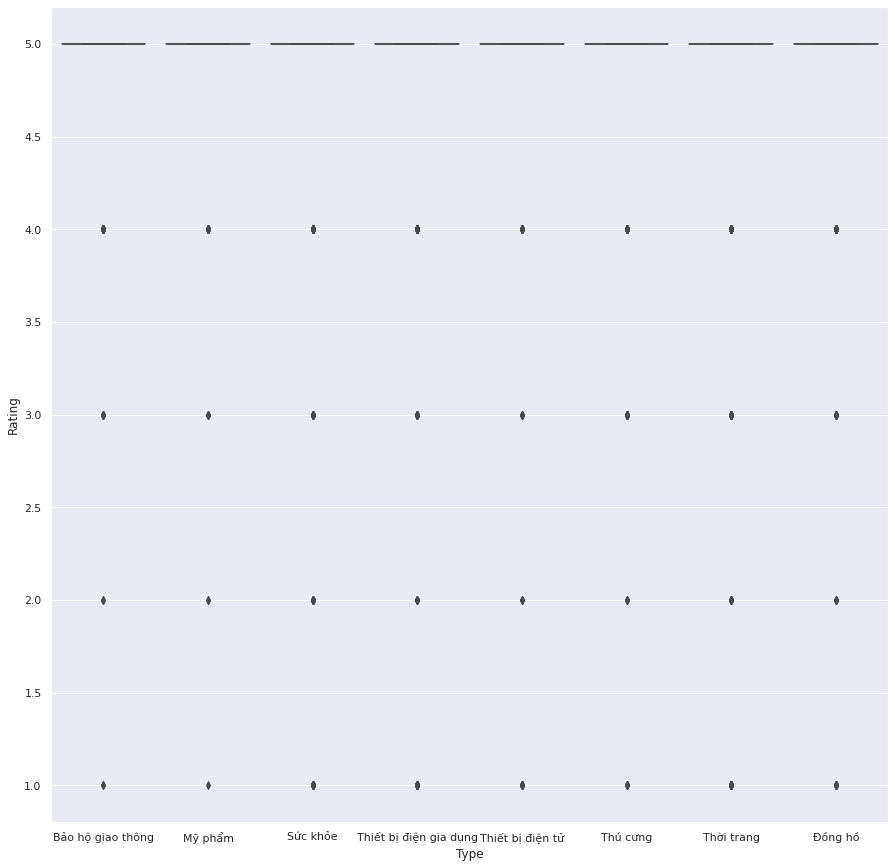

In [27]:
a4_dims = (15,15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x='Type', y='Rating', data=df, ax = ax)

# Check missing values

In [30]:
df.isna().sum(axis = 0)

Name            0
Price           0
Type            0
Average_Star    0
Sales           0
Reviews         0
Comment         0
Label           0
Rating          0
dtype: int64

# Phân tích tương quan giữa các biến

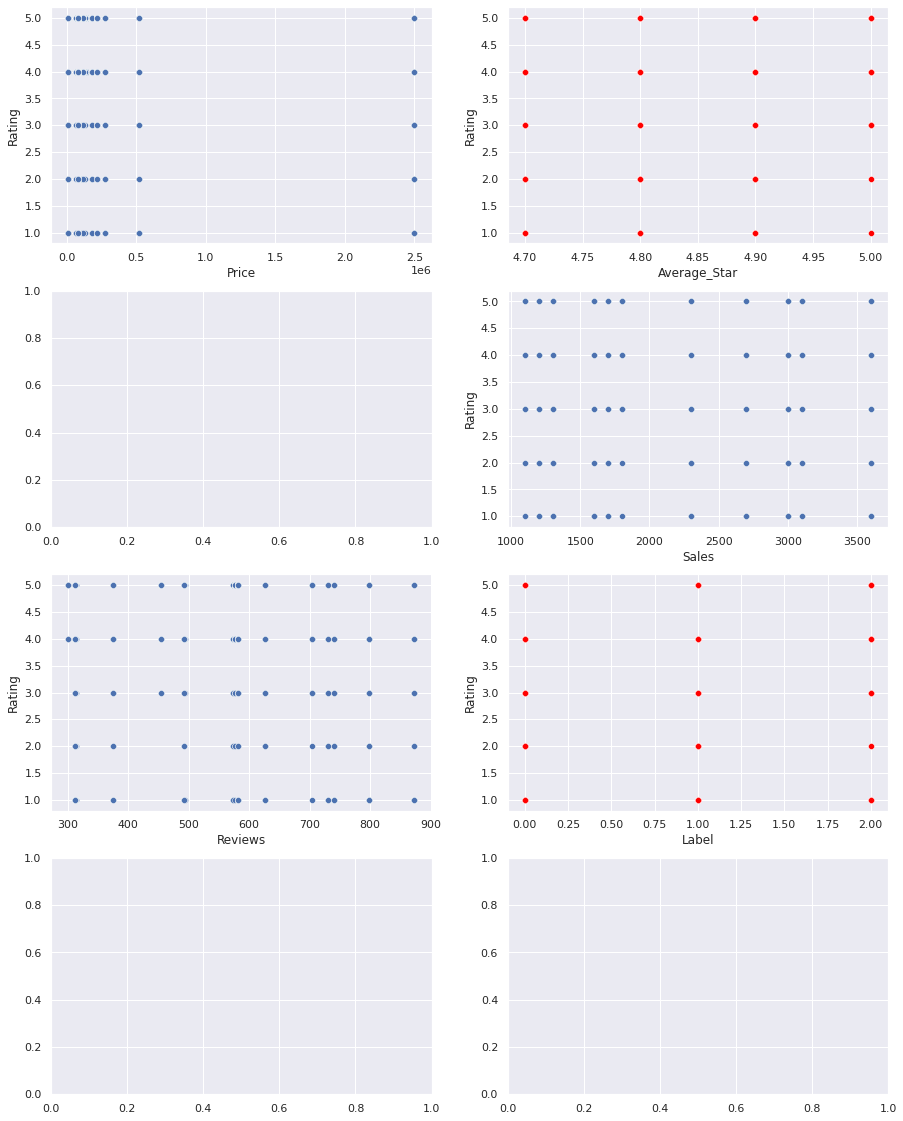

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

sns.scatterplot(x = df['Price'], y=df['Rating'], ax=axes[0,0])
sns.scatterplot(x = df['Average_Star'], y=df['Rating'], ax=axes[0,1], color='red')
sns.scatterplot(x = df['Sales'], y=df['Rating'], ax=axes[1,1])
sns.scatterplot(x = df['Reviews'], y=df['Rating'], ax=axes[2,0])
sns.scatterplot(x = df['Label'], y=df['Rating'], ax=axes[2,1], color='red')

Xét toàn bộ dataset, tìm các feature(kiểu số) có correlation so với feature target:'Rating' có ảnh hưởng nhiều nhất (đồng thuận, hoặc không đồng thuận)

In [33]:
df.corr()['Rating']

Price          -0.022902
Average_Star    0.109637
Sales          -0.041784
Reviews        -0.002760
Label           0.327519
Rating          1.000000
Name: Rating, dtype: float64

In [47]:
df.corr()['Rating'].nsmallest(10)

Sales          -0.041784
Price          -0.022902
Reviews        -0.002760
Average_Star    0.109637
Label           0.327519
Rating          1.000000
Name: Rating, dtype: float64

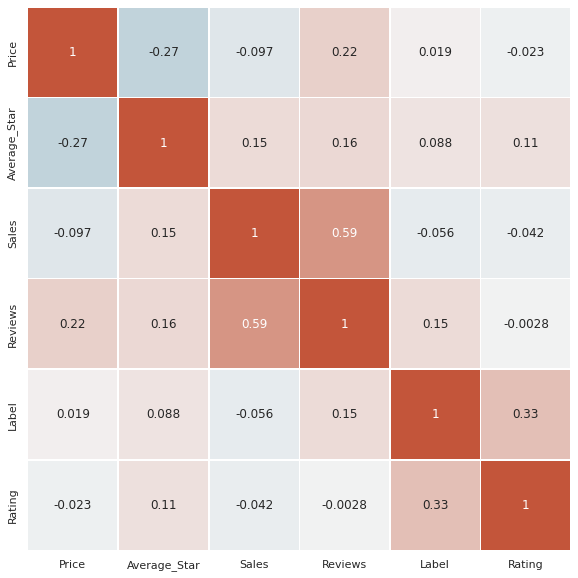

In [50]:
from sklearn.preprocessing import LabelEncoder

# lb = LabelEncoder()
cat_col = ['Name','Type']

cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10, 10))

corr_tip = df.corr()
heat_map = sns.heatmap(corr_tip, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True,
            cbar=False, square=True, linewidths=.5, cbar_kws={"shrink": .5});

từ heatmap cho thấy giữa Label và Rating có tính tương quan cao hơn so với các feature còn lại: 0.33


# Kiểm tra sự phân bố về đánh giá (rating) theo từng phân loại sản phẩmphẩm

In [59]:
df.groupby('Rating', as_index = False).count()

,Rating,Name,Price,Type,Average_Star,Sales,Reviews,Comment,Label
0,1,86,86,86,86,86,86,86,86
1,2,42,42,42,42,42,42,42,42
2,3,81,81,81,81,81,81,81,81
3,4,200,200,200,200,200,200,200,200
4,5,3774,3774,3774,3774,3774,3774,3774,3774


,Name,Price,Average_Star,Sales,Reviews,Comment,Label,Rating
Type,,,,,,,,
Thời trang,22,22,22,22,22,22,22,22
Thiết bị điện gia dụng,18,18,18,18,18,18,18,18
Sức khỏe,16,16,16,16,16,16,16,16
Đồng hồ,11,11,11,11,11,11,11,11
Thiết bị điện tử,9,9,9,9,9,9,9,9
Thú cưng,7,7,7,7,7,7,7,7
Bảo hộ giao thông,2,2,2,2,2,2,2,2
Mỹ phẩm,1,1,1,1,1,1,1,1


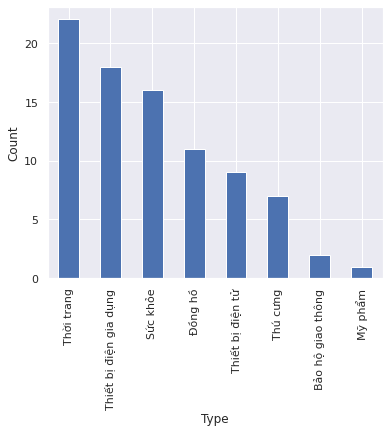

In [96]:
rating_1 = df.loc[df['Rating']==1]
plt1 = rating_1.groupby('Type').count().sort_values('Rating', ascending = False)['Rating']
plt1.plot(kind='bar', ylabel = 'Count', xlabel = 'Type', figsize=(6,5))

rating_1.groupby('Type').count().sort_values('Rating', ascending = False)

,Name,Price,Average_Star,Sales,Reviews,Comment,Label,Rating
Type,,,,,,,,
Sức khỏe,12,12,12,12,12,12,12,12
Thời trang,8,8,8,8,8,8,8,8
Thiết bị điện gia dụng,7,7,7,7,7,7,7,7
Đồng hồ,5,5,5,5,5,5,5,5
Thiết bị điện tử,3,3,3,3,3,3,3,3
Thú cưng,3,3,3,3,3,3,3,3
Bảo hộ giao thông,2,2,2,2,2,2,2,2
Mỹ phẩm,2,2,2,2,2,2,2,2


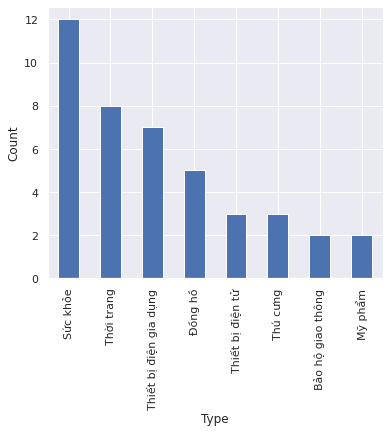

In [97]:
rating_2 = df.loc[df['Rating']==2]
plt2 = rating_2.groupby('Type').count().sort_values('Rating', ascending = False)['Rating']
plt2.plot(kind='bar', ylabel = 'Count', xlabel = 'Type', figsize=(6,5))

rating_2.groupby('Type').count().sort_values('Rating', ascending = False)

,Name,Price,Average_Star,Sales,Reviews,Comment,Label,Rating
Type,,,,,,,,
Thời trang,19,19,19,19,19,19,19,19
Sức khỏe,14,14,14,14,14,14,14,14
Thiết bị điện gia dụng,12,12,12,12,12,12,12,12
Thú cưng,12,12,12,12,12,12,12,12
Đồng hồ,9,9,9,9,9,9,9,9
Bảo hộ giao thông,6,6,6,6,6,6,6,6
Thiết bị điện tử,5,5,5,5,5,5,5,5
Mỹ phẩm,4,4,4,4,4,4,4,4


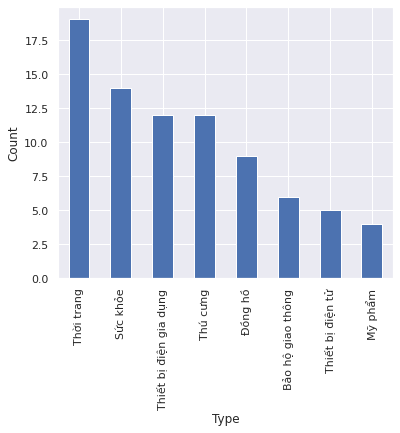

In [99]:
rating_3 = df.loc[df['Rating']==3]
plt3 = rating_3.groupby('Type').count().sort_values('Rating', ascending = False)['Rating']
plt3.plot(kind='bar', ylabel = 'Count', xlabel = 'Type', figsize=(6,5))

rating_3.groupby('Type').count().sort_values('Rating', ascending = False)

,Name,Price,Average_Star,Sales,Reviews,Comment,Label,Rating
Type,,,,,,,,
Thời trang,38,38,38,38,38,38,38,38
Thiết bị điện gia dụng,35,35,35,35,35,35,35,35
Đồng hồ,29,29,29,29,29,29,29,29
Sức khỏe,25,25,25,25,25,25,25,25
Bảo hộ giao thông,24,24,24,24,24,24,24,24
Thú cưng,21,21,21,21,21,21,21,21
Mỹ phẩm,14,14,14,14,14,14,14,14
Thiết bị điện tử,14,14,14,14,14,14,14,14


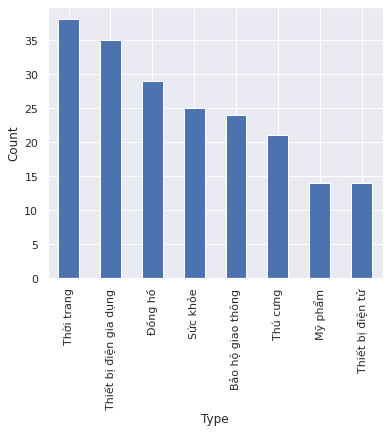

In [100]:
rating_4 = df.loc[df['Rating']==4]
plt4 = rating_4.groupby('Type').count().sort_values('Rating', ascending = False)['Rating']
plt4.plot(kind='bar', ylabel = 'Count', xlabel = 'Type', figsize=(6,5))

rating_4.groupby('Type').count().sort_values('Rating', ascending = False)

,Name,Price,Average_Star,Sales,Reviews,Comment,Label,Rating
Type,,,,,,,,
Thú cưng,709,709,709,709,709,709,709,709
Thời trang,630,630,630,630,630,630,630,630
Thiết bị điện gia dụng,565,565,565,565,565,565,565,565
Bảo hộ giao thông,426,426,426,426,426,426,426,426
Mỹ phẩm,396,396,396,396,396,396,396,396
Đồng hồ,350,350,350,350,350,350,350,350
Sức khỏe,349,349,349,349,349,349,349,349
Thiết bị điện tử,349,349,349,349,349,349,349,349


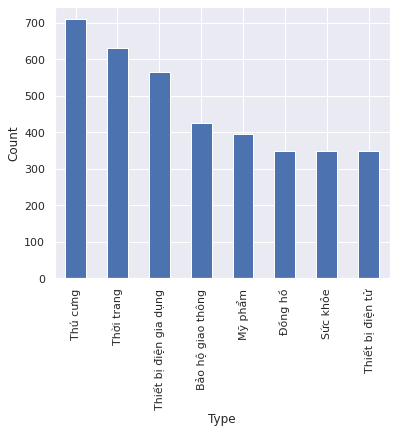

In [101]:
rating_5 = df.loc[df['Rating']==5]
plt5 = rating_5.groupby('Type').count().sort_values('Rating', ascending = False)['Rating']
plt5.plot(kind='bar', ylabel = 'Count', xlabel = 'Type', figsize=(6,5))

rating_5.groupby('Type').count().sort_values('Rating', ascending = False)